In [12]:
import pandas as pd
from sklearn.metrics.pairwise import nan_euclidean_distances 
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data_original = pd.read_csv("data.csv")
data = data_original.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     112 non-null    int64  
 1   maxO3          96 non-null     float64
 2   T9             75 non-null     float64
 3   T12            79 non-null     float64
 4   T15            75 non-null     float64
 5   Ne9            78 non-null     float64
 6   Ne12           70 non-null     float64
 7   Ne15           80 non-null     float64
 8   Vx9            94 non-null     float64
 9   Vx12           102 non-null    float64
 10  Vx15           91 non-null     float64
 11  maxO3v         100 non-null    float64
 12  WindDirection  112 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 11.5+ KB


In [14]:
data.isnull().sum(axis = 0)

Unnamed: 0        0
maxO3            16
T9               37
T12              33
T15              37
Ne9              34
Ne12             42
Ne15             32
Vx9              18
Vx12             10
Vx15             21
maxO3v           12
WindDirection     0
dtype: int64

In [15]:
data = data[['maxO3','T9','T12','T15','Ne9','Ne12', 'Ne15', 'Vx9','Vx12','Vx15','maxO3v']]
data = data.to_numpy()
print(data)

[[87.     15.6    18.5    ... -1.7101 -0.6946 84.    ]
 [82.         nan     nan ... -4.     -3.     87.    ]
 [92.     15.3    17.6    ...     nan  0.5209 82.    ]
 ...
 [99.         nan     nan ...  0.8682  0.8682     nan]
 [83.         nan     nan ... -3.7588 -4.     99.    ]
 [70.     15.7    18.6    ... -1.0419 -4.     83.    ]]


In [16]:
np.isnan(data).sum(axis=0)

array([16, 37, 33, 37, 34, 42, 32, 18, 10, 21, 12])

In [17]:
distances = nan_euclidean_distances(data)
distances

array([[ 0.        , 10.00541937,  7.97608478, ..., 20.56164562,
        21.86250283, 20.69212943],
       [10.00541937,  0.        , 20.94787554, ..., 31.53639363,
        15.9635235 , 17.84775388],
       [ 7.97608478, 20.94787554,  0.        , ..., 13.70638371,
        34.73767543, 28.94187255],
       ...,
       [20.56164562, 31.53639363, 13.70638371, ...,  0.        ,
        30.18668375, 56.42643112],
       [21.86250283, 15.9635235 , 34.73767543, ..., 30.18668375,
         0.        , 31.40763284],
       [20.69212943, 17.84775388, 28.94187255, ..., 56.42643112,
        31.40763284,  0.        ]])

In [18]:
def getNearestRow(row):
    
    correlation = distances[row].copy()
    #print(correlation)
    nrow = np.argsort(correlation)
    
    #print(nrow)
    return nrow

In [19]:
for (i,j),x in np.ndenumerate(data):   
    #print(i,j)
    if np.isnan(x):
        #print(i,j)
        nrow = getNearestRow(i)
        for row in nrow:
            if not np.isnan(data[row, j]):
                newvalue = data[row,j]
                data[i,j] = newvalue
                break
            
        
        #print(data[nrow,j])
        #print(nrow)
        #newvalue = data[nrow,j]
        #data[i,j] = newvalue

print(data)

[[87.     15.6    18.5    ... -1.7101 -0.6946 84.    ]
 [82.     19.7    22.9    ... -4.     -3.     87.    ]
 [92.     15.3    17.6    ... -1.7101  0.5209 82.    ]
 ...
 [99.     16.8    18.2    ...  0.8682  0.8682 79.    ]
 [83.     19.7    22.9    ... -3.7588 -4.     99.    ]
 [70.     15.7    18.6    ... -1.0419 -4.     83.    ]]


In [20]:
np.isnan(data).sum(axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

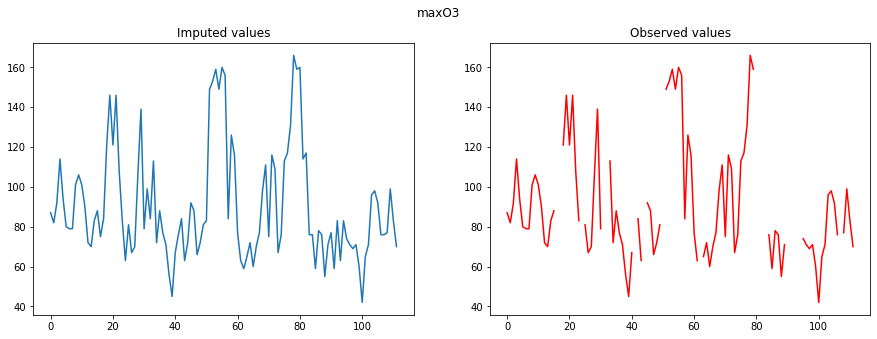

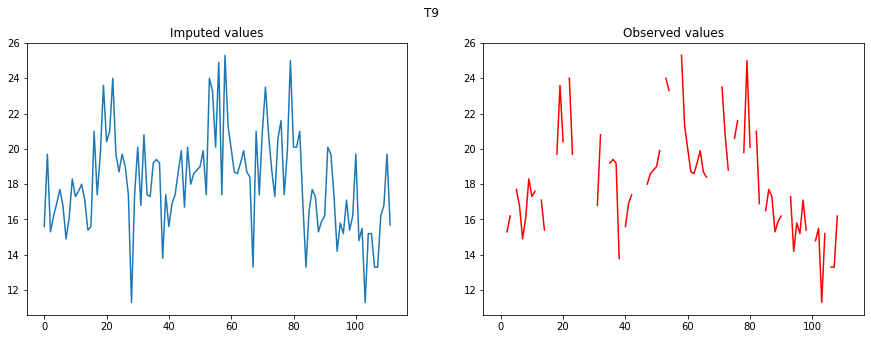

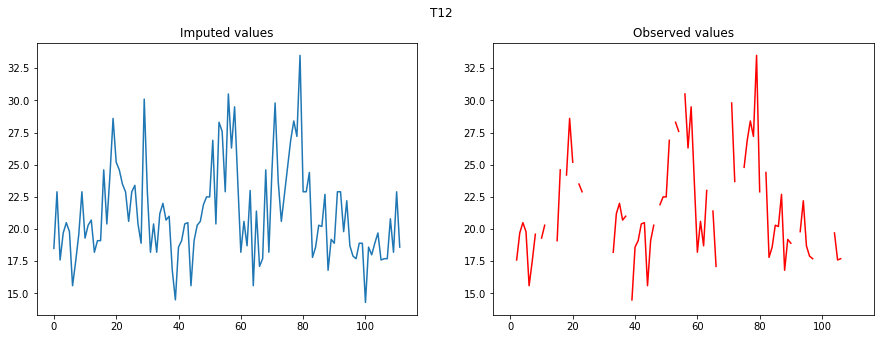

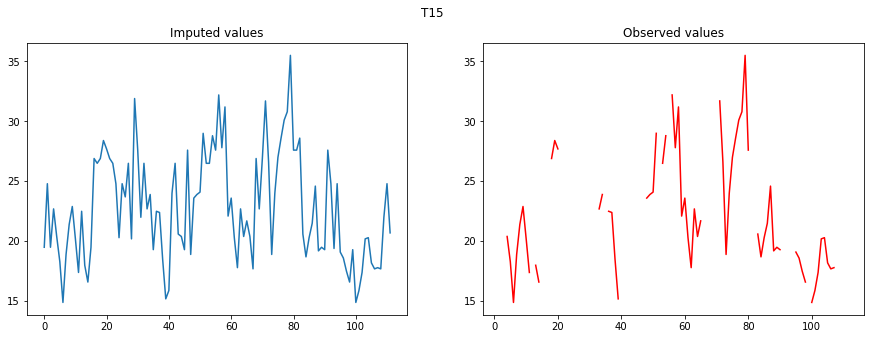

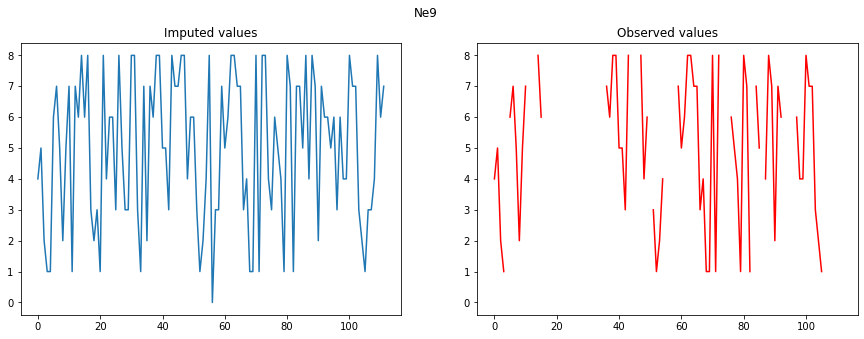

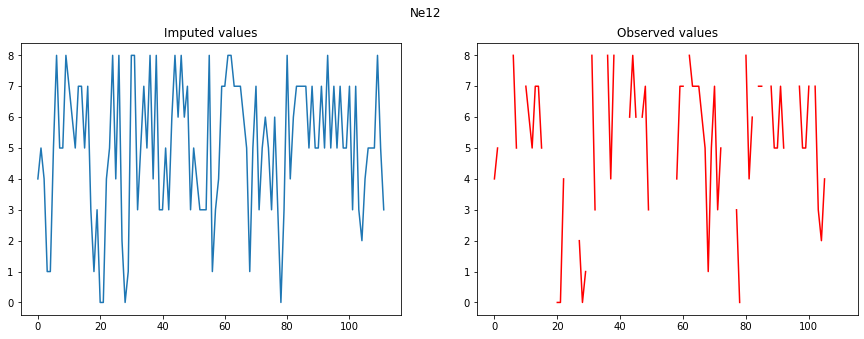

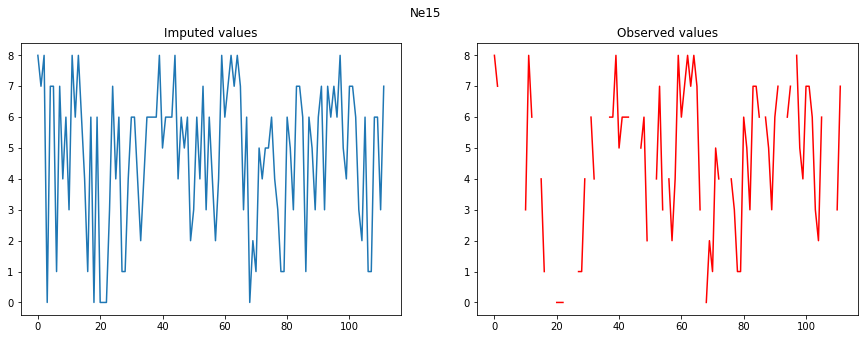

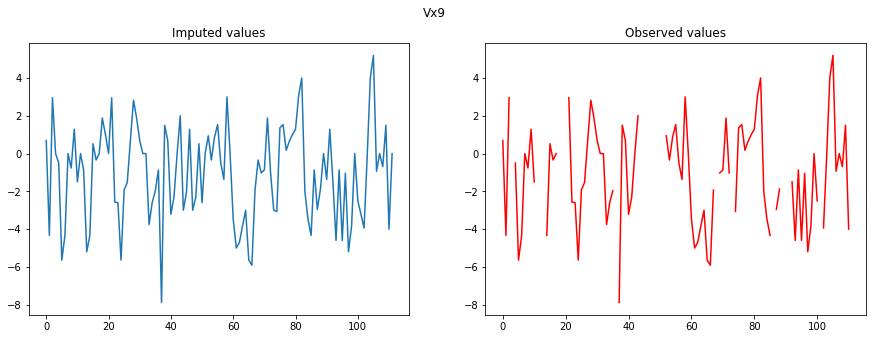

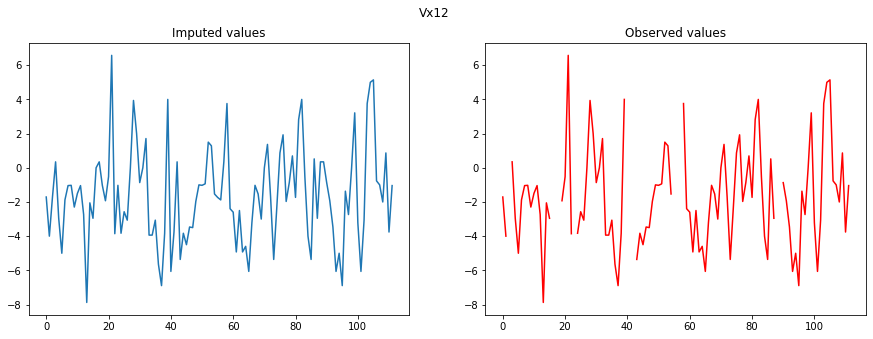

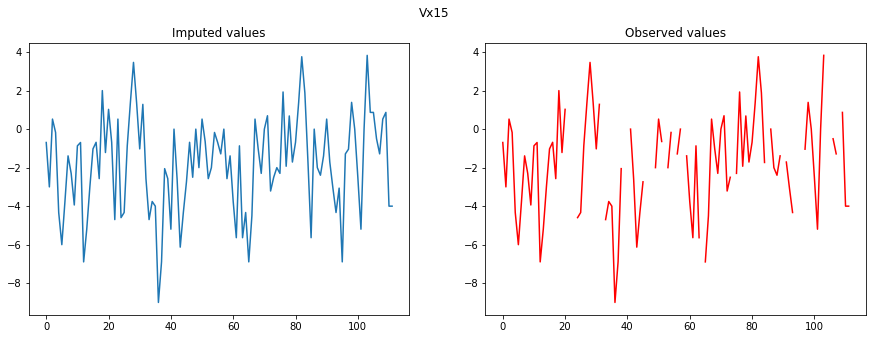

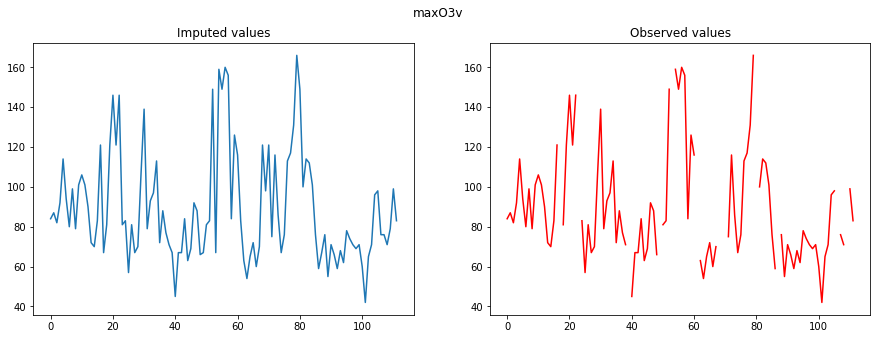

In [21]:
feature_list = ["maxO3","T9","T12","T15","Ne9","Ne12","Ne15","Vx9","Vx12","Vx15","maxO3v"]

for i in range(11):
    feature = feature_list[i]
    imp = data[:,i]
    obs = data_original[feature]


    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax1.plot(imp)
    ax1.set_title("Imputed values")
    ax2.plot(obs,color="red")
    ax2.set_title("Observed values")
    plt.suptitle(feature)